In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# <p style="background:green ;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius:400px 300px;"> Handwritten digits classification using neural network
 </p>

> > > > > > >   ![Nhhhh](https://quantdare.com/wp-content/uploads/2019/06/neural_network-1-800x332.png)

#### The aim of this notebook is to classify handwritten digits using a basic neural network. The network has only input and output layers, also called a single-layer perceptron. We will enhance the model's performance by adding a hidden layer.

#### The single-layer perceptron is mainly used for binary classification problems, where the output is either 0 or 1. It uses a linear activation function, which means that the output is a weighted sum of the inputs.

#### Neural networks with a single hidden layer are considered shallow neural networks, while those with multiple hidden layers are called deep neural networks. Single hidden layer neural networks are simpler and easier to train, but they may not be able to capture complex patterns in the data. On the other hand, deep neural networks can learn more complex representations of the data, but they may require more data and computational resources to train.




## Loading Libraries

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import warnings

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
warnings.simplefilter(action ='ignore')


## Loading dataset

In [4]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [5]:
X_train[0].shape


(28, 28)

In [6]:
X_train[0]


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

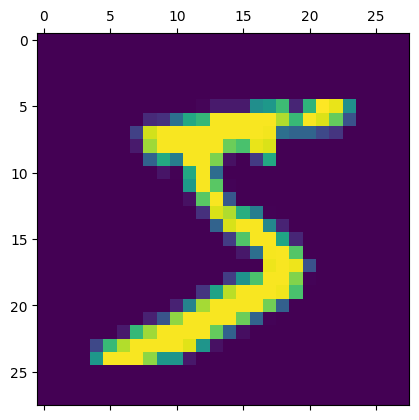

In [7]:
plt.matshow(X_train[0])


In [8]:
y_train[0]


5

In [9]:
# Normalized train and test
X_train = X_train / 255
X_test = X_test / 255

In [10]:
X_train[0]


array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [11]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [12]:
X_train_flattened.shape


(60000, 784)

In [13]:
X_train_flattened[0]


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

## Simple neural network with no hidden layers

In [14]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4704 - accuracy: 0.8777
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3038 - accuracy: 0.9156
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2838 - accuracy: 0.9199
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2729 - accuracy: 0.9236
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2666 - accuracy: 0.9262


In [15]:
model.evaluate(X_test_flattened, y_test)


313/313 [==============================] - 1s 1ms/step - loss: 0.2710 - accuracy: 0.9236


[0.2710263729095459, 0.9236000180244446]

In [16]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 0s 1ms/step


array([3.9245225e-02, 3.1585049e-07, 7.8135401e-02, 9.5284837e-01,
       3.5483018e-03, 1.1101600e-01, 1.6604217e-06, 9.9972516e-01,
       7.4356727e-02, 6.4838201e-01], dtype=float32)

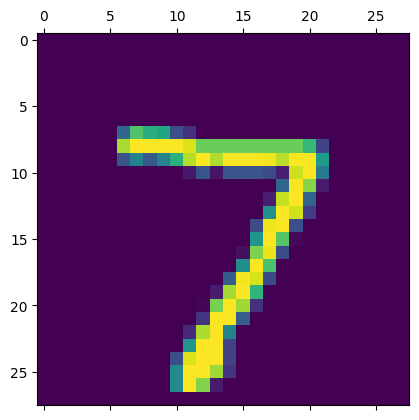

In [17]:
plt.matshow(X_test[0])


In [18]:
# np.argmax finds a maximum element from an array and returns the index of it
np.argmax(y_predicted[0])


7

In [19]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]


In [20]:
y_predicted_labels[:5]


[7, 2, 1, 0, 4]

In [21]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    1,    2,    0,    5,    5,    2,    1,    0],
       [   0, 1109,    3,    2,    1,    1,    4,    2,   13,    0],
       [   8,    8,  926,   14,   12,    2,   13,    9,   36,    4],
       [   4,    0,   22,  923,    1,   23,    3,    8,   17,    9],
       [   1,    1,    2,    1,  940,    0,   10,    2,    7,   18],
       [  11,    3,    3,   30,   14,  779,   18,    5,   24,    5],
       [  13,    3,    5,    1,    8,   11,  915,    1,    1,    0],
       [   2,    5,   24,    8,   12,    1,    0,  941,    3,   32],
       [  10,    7,    6,   29,   12,   35,   10,   10,  847,    8],
       [  11,    7,    1,   11,   59,    7,    0,   17,    4,  892]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

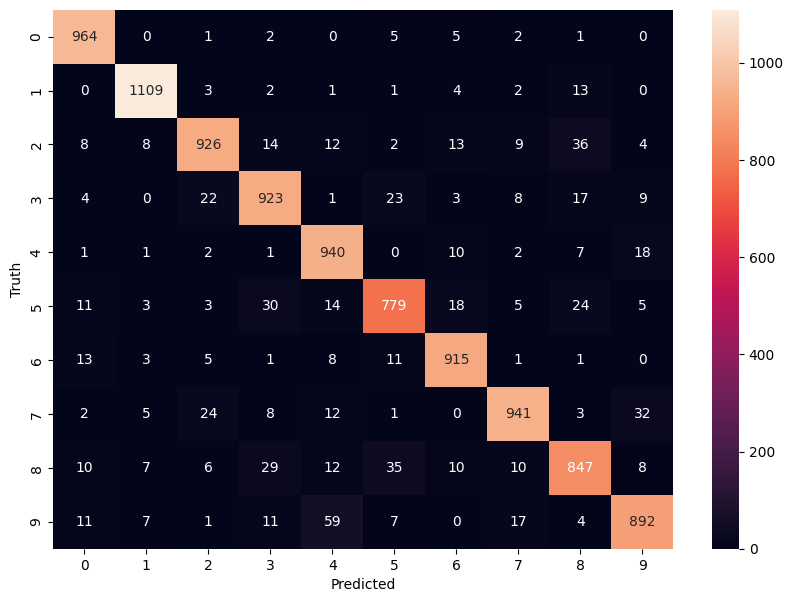

In [22]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Creating new model using hidden layer


In [23]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2642 - accuracy: 0.9255
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1183 - accuracy: 0.9657
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0829 - accuracy: 0.9757
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0631 - accuracy: 0.9810
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0506 - accuracy: 0.9847


In [24]:
model.evaluate(X_test_flattened,y_test) # In this model, accuracy is more better than the previous model


313/313 [==============================] - 1s 1ms/step - loss: 0.0848 - accuracy: 0.9748


[0.08483338356018066, 0.9747999906539917]

In [25]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

313/313 [==============================] - 0s 1ms/step


Text(95.72222222222221, 0.5, 'Truth')

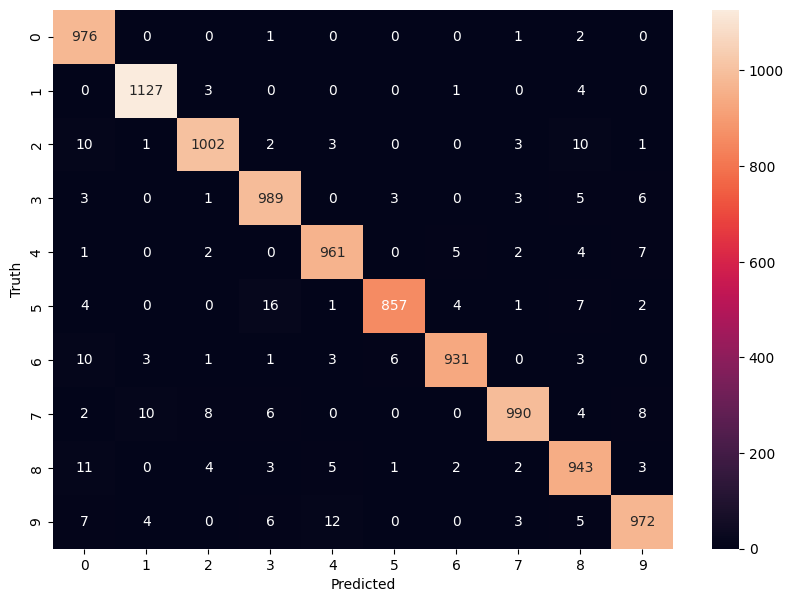

In [26]:
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Using Flatten layer so that we don't have to call reshape on input dataset


In [27]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2757 - accuracy: 0.9216
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1252 - accuracy: 0.9633
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0864 - accuracy: 0.9743
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0661 - accuracy: 0.9796
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0513 - accuracy: 0.9843
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0426 - accuracy: 0.9869
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0335 - accuracy: 0.9898
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0272 - accuracy: 0.9916
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0236 - accuracy: 0.9928
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.018

In [28]:
model.evaluate(X_test,y_test)


313/313 [==============================] - 1s 2ms/step - loss: 0.0850 - accuracy: 0.9779


[0.084958016872406, 0.9779000282287598]

## As a consequence, the model with a hidden layer leads to enhance accuracy. Although we can even improve it by using Flatten.

 # <p style="background:green ;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius:400px 300px;"> End
 </p>